聚类算法-谱聚类
===

# 1.谱
方阵的谱：方阵作为线性算子，它的所有特征值的全体。
- 方阵的谱半径为最大的特征值
- 矩阵A的谱半径:$A^TA$的最大特征值

谱聚类是一种基于图论的聚类方法，通过对样本数据的拉普拉斯矩阵的特征向量进行聚类，从而达到对样本数据聚类的目的

# 2.谱分析的整体过程
1. 给定一组数据$x_1,x_2,...,x_n$，记任意两个点之间的相似度("距离”的减函数)为$s_{ij}=<x_i,x_j>$， 形成相似度图(similarity graph):G=(V,E) 。 如果$x_i$和$x_j$之间的相似度$s_{ij}$大于一定的阈值，那么两个点是连接的，权值记做$s_{ij}$。
2. 接下来，可以用相似度图来解决样本数据的聚类问题:找到图的一个划分，形成若干个组(Group)，使得不同组之间有较低的权值，组内有较高的权值

# 3.邻接矩阵
给定一组样本$x_1,x_2,...,x_n$，那么对于样本$x_i,x_j$来度量它们的相似度$\omega_{ij}$，根据高斯相似度，可以得到
$$\omega_{ij}=e^{-\frac{||x_i-x_j||\_2^2}{2\sigma^2}}$$
根据这个公式，我们可以求任意两个样本的高斯相似度，从而得到了一个$n*n$的矩阵，其中对角线为1，其余为$\omega_{ij}$，我们将对角线清零，可以得到邻接矩阵
$$
W=\begin{cases}
0 & i = j\\\\
\omega_{ij} & i \neq j
\end{cases},i,j=1,2,...,n
$$

# 4.度与拉普拉斯矩阵
顶点的度$d_i=\sum_{j=1}^n\omega_{ij}$，所以这就是为什么需要将对角线清零。因为对角线清零后，顶点的度就是样本这一行的相似度加和.如果将邻接矩阵的对角线放置上各个顶点的度，其余清零，则得到了度矩阵D，它是一个对称阵，也是对角阵。拉普拉斯矩阵
$$L_{n*n} = D_{n*n} - W_{n*n}$$

# 5.谱聚类算法
## 5.1.谱聚类算法

L是一个$n*n$的矩阵，n是样本个数，拉普拉斯矩阵是一个实数形成的对称矩阵，那么总可以求出它的特征值与特征向量，
使得等式成立
$$L \bullet \overrightarrow{\mu_i}=\lambda_i \bullet \overrightarrow{\mu_i}$$
由于L是一个半正定矩阵，所以特征值$\lambda$最小是0，剩下的都是正数，那么我们就可以有如下描述：
> 假设$\lambda_1,\lambda_2,...,\lambda_n$是拉普拉斯矩阵L的n个特征值，其中$\lambda_1=0$，剩下的$\lambda$是大于0的正数，同样有n个特征向量与之对应$\overrightarrow{\mu_1},\overrightarrow{\mu_2},...,\overrightarrow{\mu_n}$,其中每个$\overrightarrow{\mu_i}$都是一个列向量，那么这n个列向量可以组成一个$n*n$的矩阵，如下：
$$
\begin{bmatrix}
\mu_{11}&\mu_{12}&\dots&\mu_{1k}&\dots&\mu_{1n}\\\\
\mu_{21}&\mu_{22}&\dots&\mu_{2k}&\dots&\mu_{2n}\\\\
\vdots&\vdots&\vdots&\vdots&\vdots&\vdots\\\\
\mu_{n1}&\mu_{n2}&\dots&\mu_{nk}&\dots&\mu_{nn}\\\\
\end{bmatrix}
$$
假设我们需要将原始样本分为K个簇，那么我们只保留上述矩阵的前K个列，后面的$n-K$个列舍弃，那么第一行的k个值就是样本1的特征，第二行就是样本2的特征，...,第n行就是第n个样本的特征，然后做K-Means聚类就可以了

## 5.2.谱分析的整体过程
1. 给定一组数据$x_1,x_2,...,x_n$，记任意两个点之间的相似度("距离”的减函数)为$s_{ij}=<x_i,x_j>$， 形成相似度图(similarity graph):G=(V,E) 。 如果$x_i$和$x_j$之间的相似度$s_{ij}$大于一定的阈值，那么两个点是连接的，权值记做$s_{ij}$。
2. 接下来，可以用相似度图来解决样本数据的聚类问题:找到图的一个划分，形成若干个组(Group)，使得不同组之间有较低的权值，组内有较高的权值

开始谱聚类...


谱聚类完成...


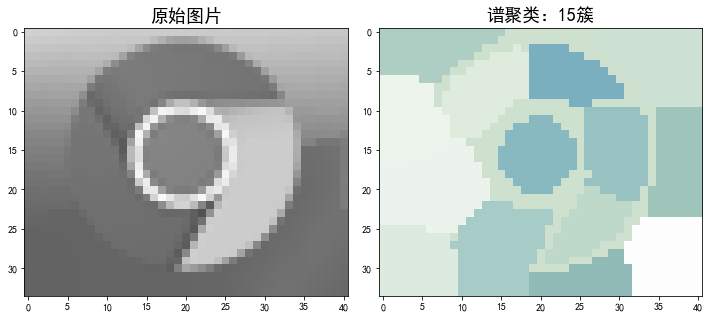

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
from PIL import Image
%matplotlib inline
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

pic = Image.open('data/Chrome.png')
pic = pic.convert('L')
data = np.array(pic).astype(np.float) / 255

plt.figure(figsize=(10, 5), facecolor='w')
plt.subplot(121)
plt.imshow(pic, cmap=plt.cm.gray, interpolation='nearest')
plt.title(u'原始图片', fontsize=18)
n_clusters = 15

affinity = image.img_to_graph(data)
beta = 3
affinity.data = np.exp(-beta * affinity.data / affinity.data.std()) + 10e-5
# a = affinity.toarray()
# b = np.diag(a.diagonal())
# a -= b
print('开始谱聚类...')
y = spectral_clustering(affinity, n_clusters=n_clusters, assign_labels='kmeans', random_state=1)
print('谱聚类完成...')
y = y.reshape(data.shape)
for n in range(n_clusters):
    data[y == n] = n
plt.subplot(122)
clrs = []
for c in np.linspace(16776960, 16711935, n_clusters):
    clrs.append('#%06d' % c)
cm = matplotlib.colors.ListedColormap(clrs)
plt.imshow(data, cmap=cm, interpolation='nearest')
plt.title(u'谱聚类：%d簇' % n_clusters, fontsize=18)
plt.tight_layout()